<a href="https://colab.research.google.com/github/sanalsajann/crop-disease-detection/blob/main/crop_disease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files
uploaded = files.upload()

Saving PlantVillage ZIP.zip to PlantVillage ZIP.zip


zipping

For data preprocessing


In [ ]:
import zipfile
import os

zip_path = "/content/PlantVillage ZIP.zip"  # Change this to your uploaded file name
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction Complete!")


✅ Extraction Complete!


In [ ]:
print("Dataset Root Contents:", os.listdir("/content/dataset"))


Dataset Root Contents: ['PlantVillage']


In [ ]:
import os

dataset_path = "/content/dataset/PlantVillage"
print("Classes Available:", os.listdir(dataset_path))


Classes Available: ['Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato_healthy', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato_Leaf_Mold']


In [ ]:
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Make sure it's a folder
        print(f"Class: {class_name} → {len(os.listdir(class_path))} images")


Class: Tomato__Tomato_mosaic_virus → 373 images
Class: Tomato_Bacterial_spot → 2127 images
Class: Tomato_healthy → 1591 images
Class: Tomato__Tomato_YellowLeaf__Curl_Virus → 3209 images
Class: Tomato_Septoria_leaf_spot → 1771 images
Class: Tomato__Target_Spot → 1404 images
Class: Tomato_Early_blight → 1000 images
Class: Tomato_Spider_mites_Two_spotted_spider_mite → 1676 images
Class: Tomato_Late_blight → 1909 images
Class: Tomato_Leaf_Mold → 952 images


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
dataset_path = "/content/dataset/PlantVillage"
output_path = "/content/split_dataset"
train_path = os.path.join(output_path, "train")
test_path = os.path.join(output_path, "test")

# Create train and test folders
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Split each class into train & test
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)  # 80% Train, 20% Test

        # Create class subfolders in train & test directories
        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

        # Move images to respective folders
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_path, class_name, img))
        for img in test_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(test_path, class_name, img))

print("✅ Dataset successfully split into Train & Test sets!")


✅ Dataset successfully split into Train & Test sets!


In [ ]:
print("Train Set:", os.listdir(train_path))
print("Test Set:", os.listdir(test_path))

for class_name in os.listdir(train_path):
    print(f"Class: {class_name}")
    print(f"  → Train Images: {len(os.listdir(os.path.join(train_path, class_name)))}")
    print(f"  → Test Images: {len(os.listdir(os.path.join(test_path, class_name)))}")


Train Set: ['Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato_healthy', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato_Leaf_Mold']
Test Set: ['Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato_healthy', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato_Leaf_Mold']
Class: Tomato__Tomato_mosaic_virus
  → Train Images: 298
  → Test Images: 75
Class: Tomato_Bacterial_spot
  → Train Images: 1701
  → Test Images: 426
Class: Tomato_healthy
  → Train Images: 1272
  → Test Images: 319
Class: Tomato__Tomato_YellowLeaf__Curl_Virus
  → Train Images: 2567
  → Test Images: 642
Class: Tomato_Septoria_leaf_spot
  → Train Images: 1416
  → Test Images: 355
Class: Tomato__Target_Spot
  → Train 

Build the cnn model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [ ]:

train_dir = "/content/split_dataset/train"
test_dir = "/content/split_dataset/test"


train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)


Found 12804 images belonging to 10 classes.
Found 3207 images belonging to 10 classes.


In [ ]:
# Define CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(train_generator.class_indices), activation="softmax")  # Output layer
])

# Compile Model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,943,946 (49.38 MB)

 Trainable params: 12,943,946 (49.38 MB)

 Non-trainable params: 0 (0.00 B)

new cnn model


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Change 10 to the number of classes you have
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower for smoother learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
import numpy as np
print(np.bincount(train_generator.classes))


[1361  640 1222  609 1133 1072  899 2053  239 1018]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for validation (without augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a validation generator from the dataset
val_generator = val_datagen.flow_from_directory(
    '/content/split_dataset/test',  # Make sure this path exists
    target_size=(224, 224),  # Ensure it matches model input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No need to shuffle for validation/testing
)


Found 3207 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)




AttributeError: 'numpy.ndarray' object has no attribute 'get'

Train the model


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 570s 1s/step - accuracy: 0.4060 - loss: 1.6947 - val_accuracy: 0.5363 - val_loss: 1.5989
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.6955 - loss: 0.8689 - val_accuracy: 0.5606 - val_loss: 1.5626
Epoch 3/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 547s 1s/step - accuracy: 0.7478 - loss: 0.7102 - val_accuracy: 0.6922 - val_loss: 1.0025
Epoch 4/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.7900 - loss: 0.5892 - val_accuracy: 0.7041 - val_loss: 0.9134
Epoch 5/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 549s 1s/step - accuracy: 0.8217 - loss: 0.5078 - val_accuracy: 0.7312 - val_loss: 0.9302
Epoch 6/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 551s 1s/step - accuracy: 0.8386 - loss: 0.4548 - val_accuracy: 0.7845 - val_loss: 0.7118
Epoch 7/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 546s 1s/step - accuracy: 0.8568 - loss: 0.4080 - val_accuracy: 0.8347 - val_loss: 0.4751
Epoch 8/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 536s 1s/step - accuracy: 0.8839 - loss: 0.3426 - val_accu

  cnn made from scatch. Try pretrained models. compare accuracy

Evaluate the model


In [ ]:
"""import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get test predictions
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))

# Generate confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
"""

In [ ]:
import os
print("File exists:", os.path.exists("crop_disease_model.h5"))


File exists: False


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


101/101 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.8180 - loss: 0.7050
Test Accuracy: 81.73%
Test Loss: 0.6946


In [ ]:
model.save("crop_disease_model.h5")


In [ ]:
model.save("crop_disease_model.keras")


In [ ]:
# Load the saved model
from tensorflow.keras.models import load_model
import numpy as np

model = load_model("crop_disease_model.keras")  # Load in recommended format

# Get class indices from the test generator
class_indices = test_generator.class_indices  # Dictionary: {'class_name': class_index}
class_names = list(class_indices.keys())  # List of class names in order

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get class indices

# Map predicted indices to class names
predicted_class_names = [class_names[i] for i in predicted_classes]

# Print results (example: first 10 predictions)
for i in range(10):
    print(f"Predicted: {predicted_class_names[i]}")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


101/101 ━━━━━━━━━━━━━━━━━━━━ 34s 335ms/step
Predicted: Tomato_Late_blight
Predicted: Tomato__Tomato_YellowLeaf__Curl_Virus
Predicted: Tomato_Spider_mites_Two_spotted_spider_mite
Predicted: Tomato_Late_blight
Predicted: Tomato_Late_blight
Predicted: Tomato_Late_blight
Predicted: Tomato__Target_Spot
Predicted: Tomato_healthy
Predicted: Tomato_Late_blight
Predicted: Tomato__Target_Spot


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("crop_disease_model.keras")  # Use your actual model filename

# Load the class indices from the test generator
class_indices = test_generator.class_indices  # {'class_name': class_index}
class_names = list(class_indices.keys())  # List of class names

# Load a sample image for prediction
img_path = "/content/split_dataset/test/Tomato_Septoria_leaf_spot/fcd7b23f-81f6-4e31-9c8f-66dc04a44f2c___Keller.St_CG 1826.JPG"  # Change to your actual image path
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

# Predict class probabilities
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

# Get the class name
predicted_class_name = class_names[predicted_class_index]

# Print result
print(f"Predicted Class: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted Class: Tomato_Septoria_leaf_spot


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test data directory
test_dir = ""

# Create test data generator (no data augmentation for test set)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Match your model input size
    batch_size=32,
    class_mode='categorical',  # Match the output of your model
    shuffle=False  # Don't shuffle for evaluation
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile

zip_path = "/content/PlantVillage ZIP.zip"  # Update with your file name
extract_path = "/content/dataset_folder"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
import shutil

train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

shutil.rmtree(train_dir, ignore_errors=True)
shutil.rmtree(test_dir, ignore_errors=True)

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [ ]:
import os
print(os.listdir("/content/"))


['.config', 'PlantVillage ZIP.zip', '.ipynb_checkpoints', 'dataset', 'split_dataset', 'sample_data']


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "/content/crop_disease_model.keras"  # Update this if needed
model = load_model(model_path)
print("✅ Model Loaded Successfully!")


✅ Model Loaded Successfully!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test directory (update if needed)
test_dir = "/content/split_dataset/test"

# Create a test data generator (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Same size as model input
    batch_size=32,           # Adjust as needed
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle for evaluation
)

# Get class labels
class_labels = list(test_generator.class_indices.keys())
print("✅ Test Generator Ready! Classes:", class_labels)


Found 3207 images belonging to 10 classes.
✅ Test Generator Ready! Classes: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
import numpy as np

# Predict on test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes  # Actual labels

print("✅ Predictions Generated!")


101/101 ━━━━━━━━━━━━━━━━━━━━ 28s 274ms/step
✅ Predictions Generated!


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_classes, predicted_classes)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")


✅ Test Accuracy: 81.73%


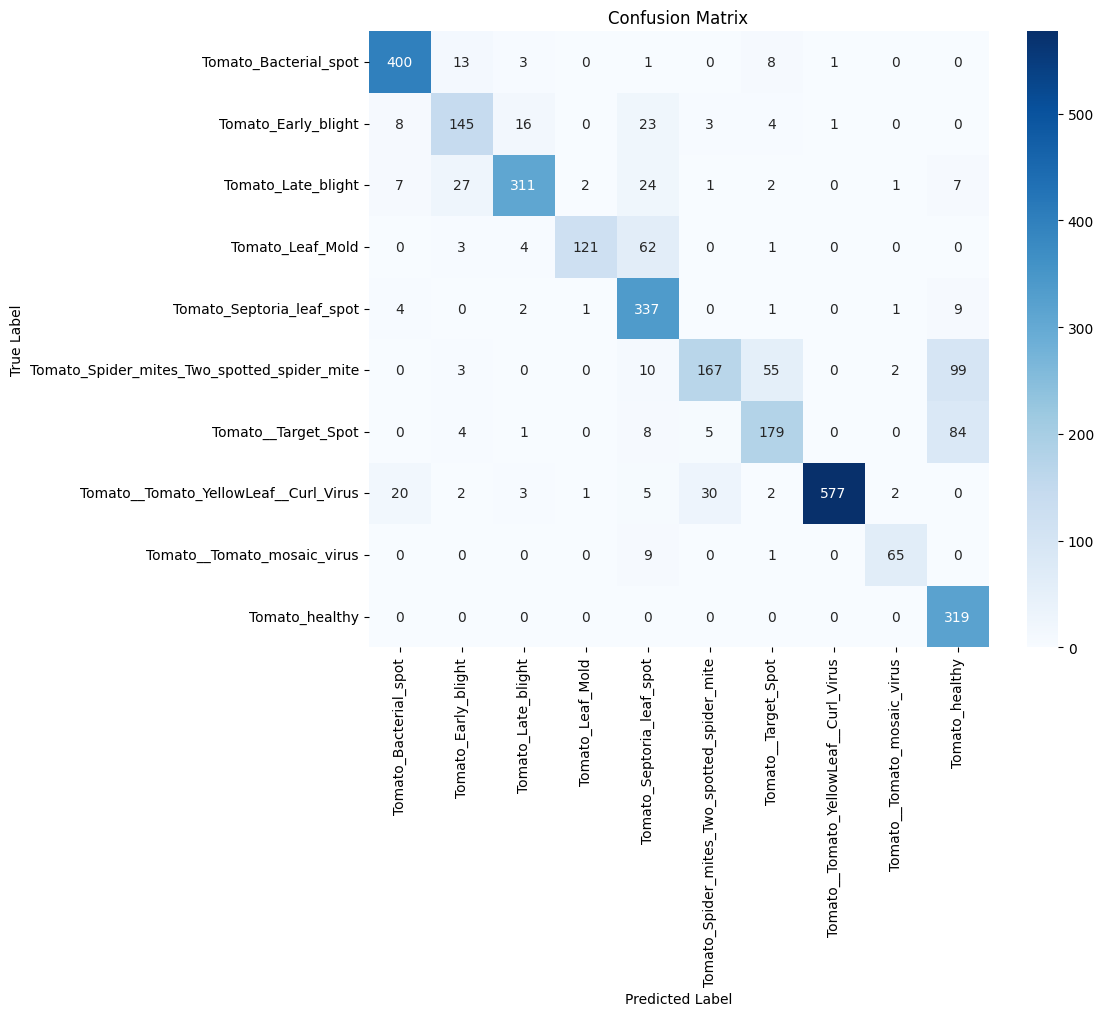

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot it
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", report)


Classification Report:
                                              precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.91      0.94      0.92       426
                        Tomato_Early_blight       0.74      0.72      0.73       200
                         Tomato_Late_blight       0.91      0.81      0.86       382
                           Tomato_Leaf_Mold       0.97      0.63      0.77       191
                  Tomato_Septoria_leaf_spot       0.70      0.95      0.81       355
Tomato_Spider_mites_Two_spotted_spider_mite       0.81      0.50      0.62       336
                        Tomato__Target_Spot       0.71      0.64      0.67       281
      Tomato__Tomato_YellowLeaf__Curl_Virus       1.00      0.90      0.95       642
                Tomato__Tomato_mosaic_virus       0.92      0.87      0.89        75
                             Tomato_healthy       0.62      1.00      0.76       319

                                   accu

Found 586 misclassified images.


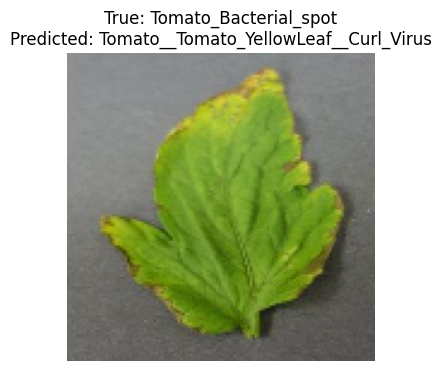

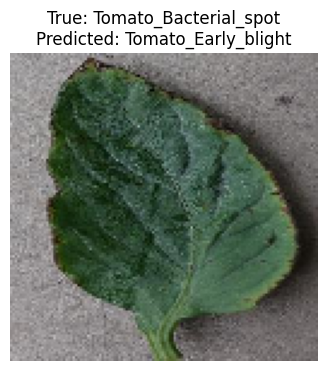

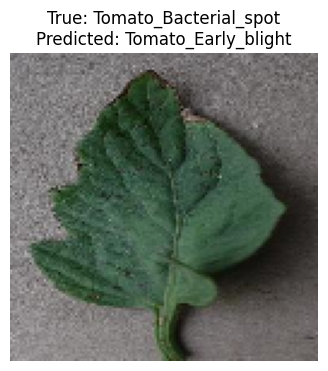

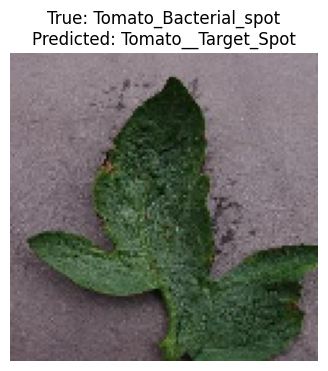

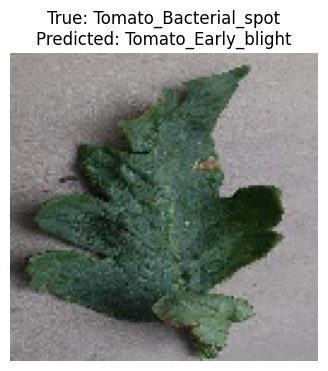

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Find indices of misclassified images
misclassified_indices = [i for i in range(len(true_classes)) if predicted_classes[i] != true_classes[i]]
print(f"Found {len(misclassified_indices)} misclassified images.")

# Number of misclassified images to display
num_to_display = 5
if len(misclassified_indices) < num_to_display:
    num_to_display = len(misclassified_indices)

# Get a reverse mapping from label index to class name
index_to_class = {v: k for k, v in test_generator.class_indices.items()}

# Display misclassified images
for i in range(num_to_display):
    idx = misclassified_indices[i]
    img_path = test_generator.filepaths[idx]

    # Load and preprocess the image for display
    img = image.load_img(img_path, target_size=(128, 128))

    # Get true and predicted labels
    true_label = index_to_class[true_classes[idx]]
    predicted_label = index_to_class[predicted_classes[idx]]

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis("off")
    plt.show()


TRAINING USING A PRETRAINED MODEL


Will continue later


In [ ]:
import tensorflow.keras.backend as K
K.clear_session()  # Clears the previous model


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Load EfficientNetB0 with the correct input shape
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build a new model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # Adjust this based on the number of classes
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),  # Change this to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3207 images belonging to 10 classes.


In [ ]:
batch_images, batch_labels = next(test_generator)
print(batch_images.shape)  # Should print (batch_size, 224, 224, 3)


(32, 224, 224, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% data for validation
)

# Train Generator (80% of data)
train_generator = train_datagen.flow_from_directory(
    "/content/split_dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset="training"  # Training subset
)

# Validation Generator (20% of data)
val_generator = train_datagen.flow_from_directory(
    "/content/split_dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset="validation"  # Validation subset
)


Found 10246 images belonging to 10 classes.
Found 2558 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# ✅ Set correct input shape
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model
base_model.trainable = False

# Add custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")  # Adjust class count
])

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=3,          # Stop if val_loss doesn't improve for 3 epochs
    restore_best_weights=True  # Restore best model weights
)

# Train the model with EarlyStopping
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Start with 20 epochs, but it may stop early
    callbacks=[early_stopping]
)
